In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LarsCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
import pickle

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
ProfileReport(df).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [45]:
df['Pregnancies'].loc[df['Pregnancies']==0].count()

111

In [47]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [50]:
df['BMI'].loc[df['BMI']==0].count()

0

In [51]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

In [52]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

In [53]:
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

<Axes: >

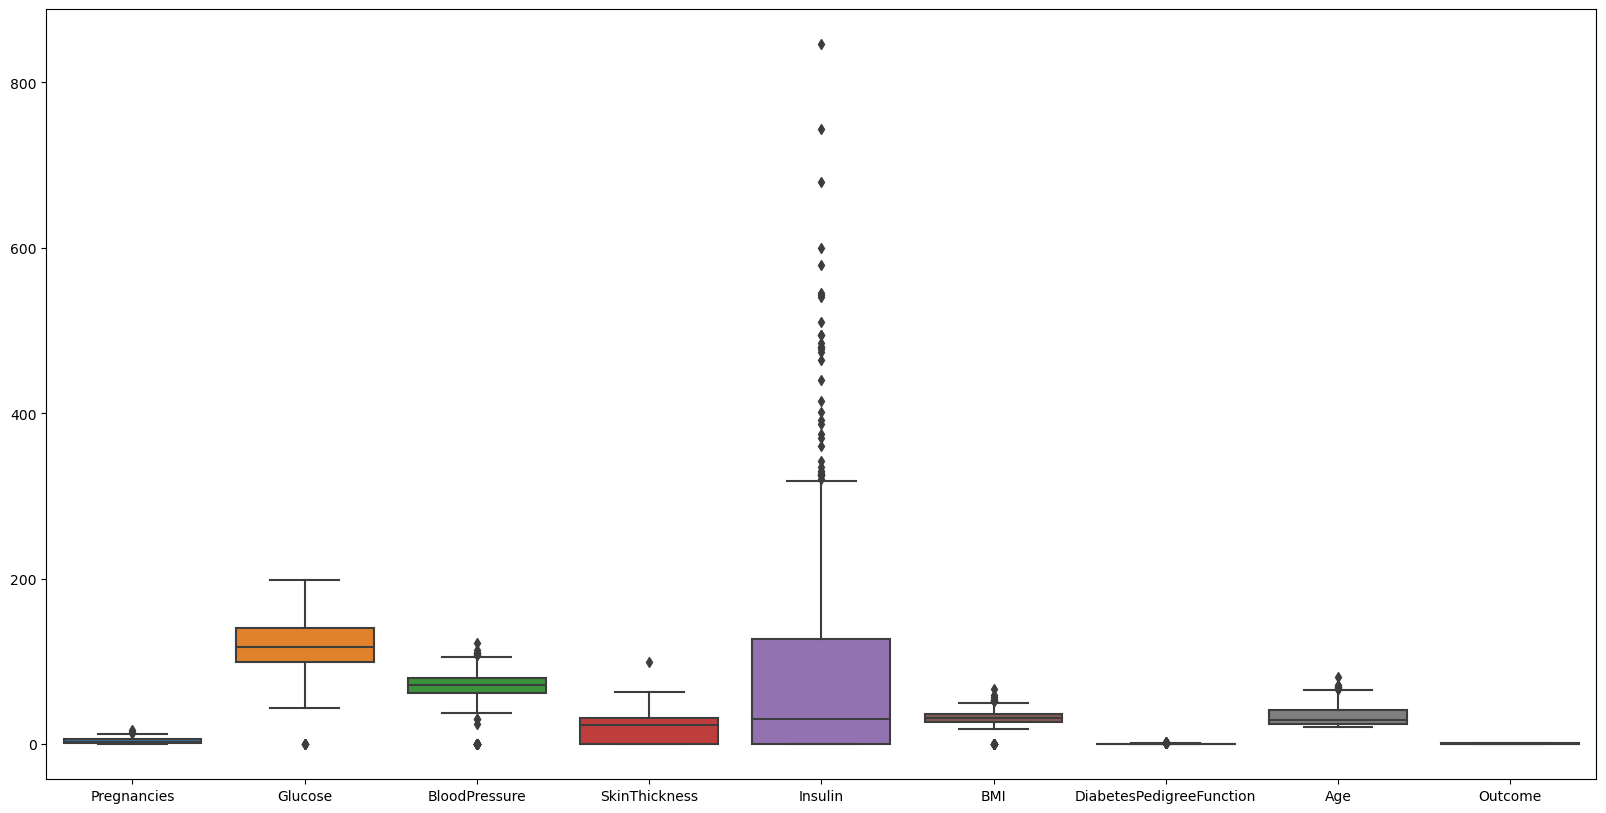

In [4]:
fig ,ax  = plt.subplots(figsize = (20,10))
sns.boxplot(data = df , ax = ax)

In [5]:
q = df['Pregnancies'].quantile(.98)
df_new = df[df['Pregnancies'] < q]

q = df_new['BMI'].quantile(.99)
df_new = df_new[df_new['BMI']< q]

q = df_new['SkinThickness'].quantile(.99)
df_new = df_new[df_new['SkinThickness']< q]

q = df_new['Insulin'].quantile(.95)
df_new = df_new[df_new['Insulin']< q]

q = df_new['DiabetesPedigreeFunction'].quantile(.99)
df_new = df_new[df_new['DiabetesPedigreeFunction']< q]


q = df_new['Age'].quantile(.99)
df_new = df_new[df_new['Age']< q]

In [6]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

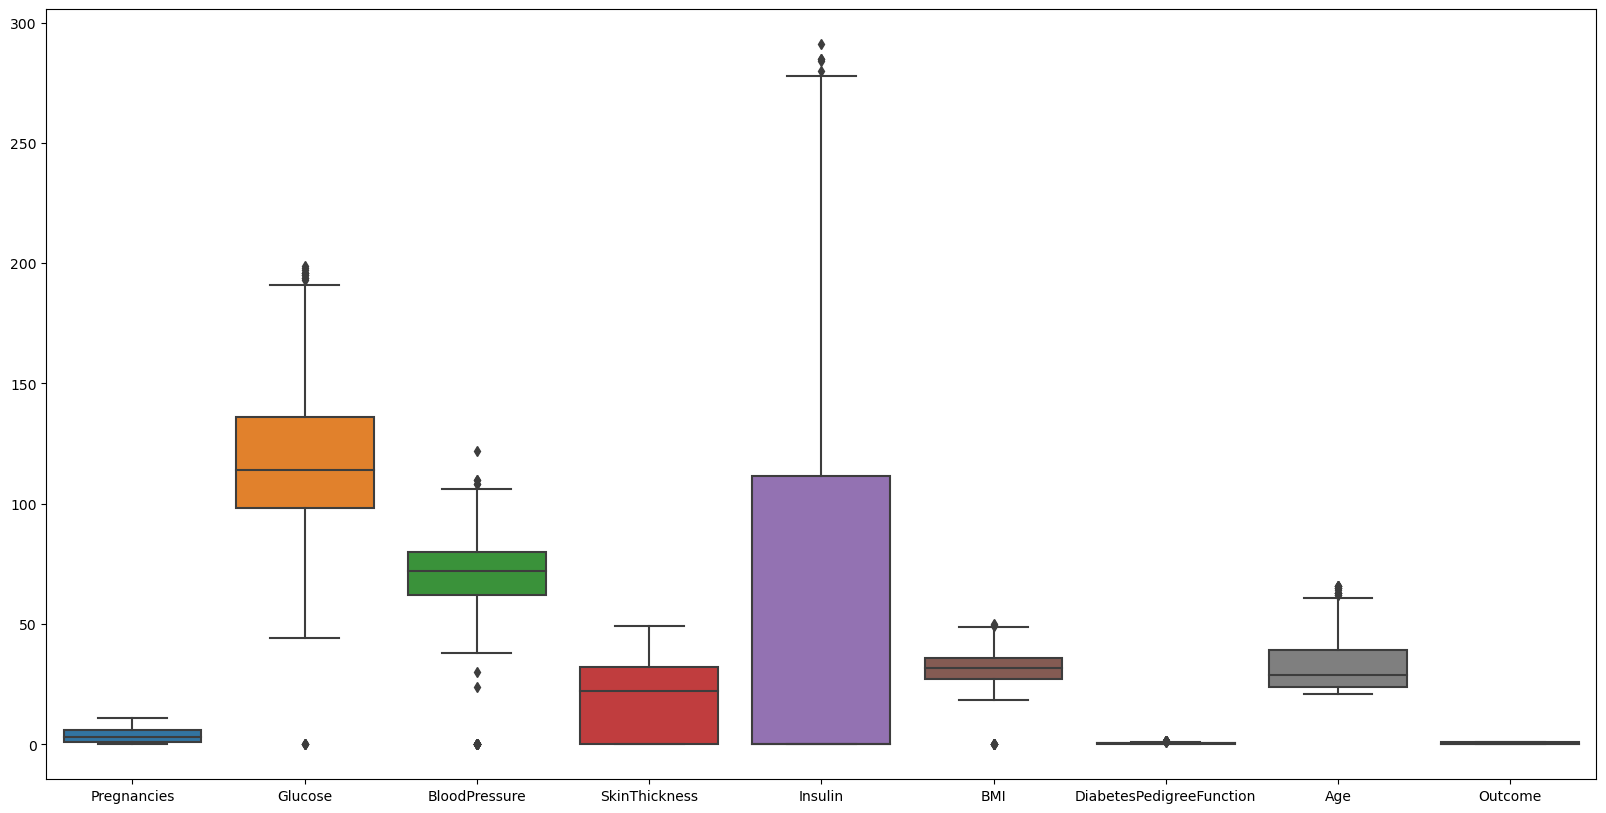

In [8]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=df_new,ax=ax)

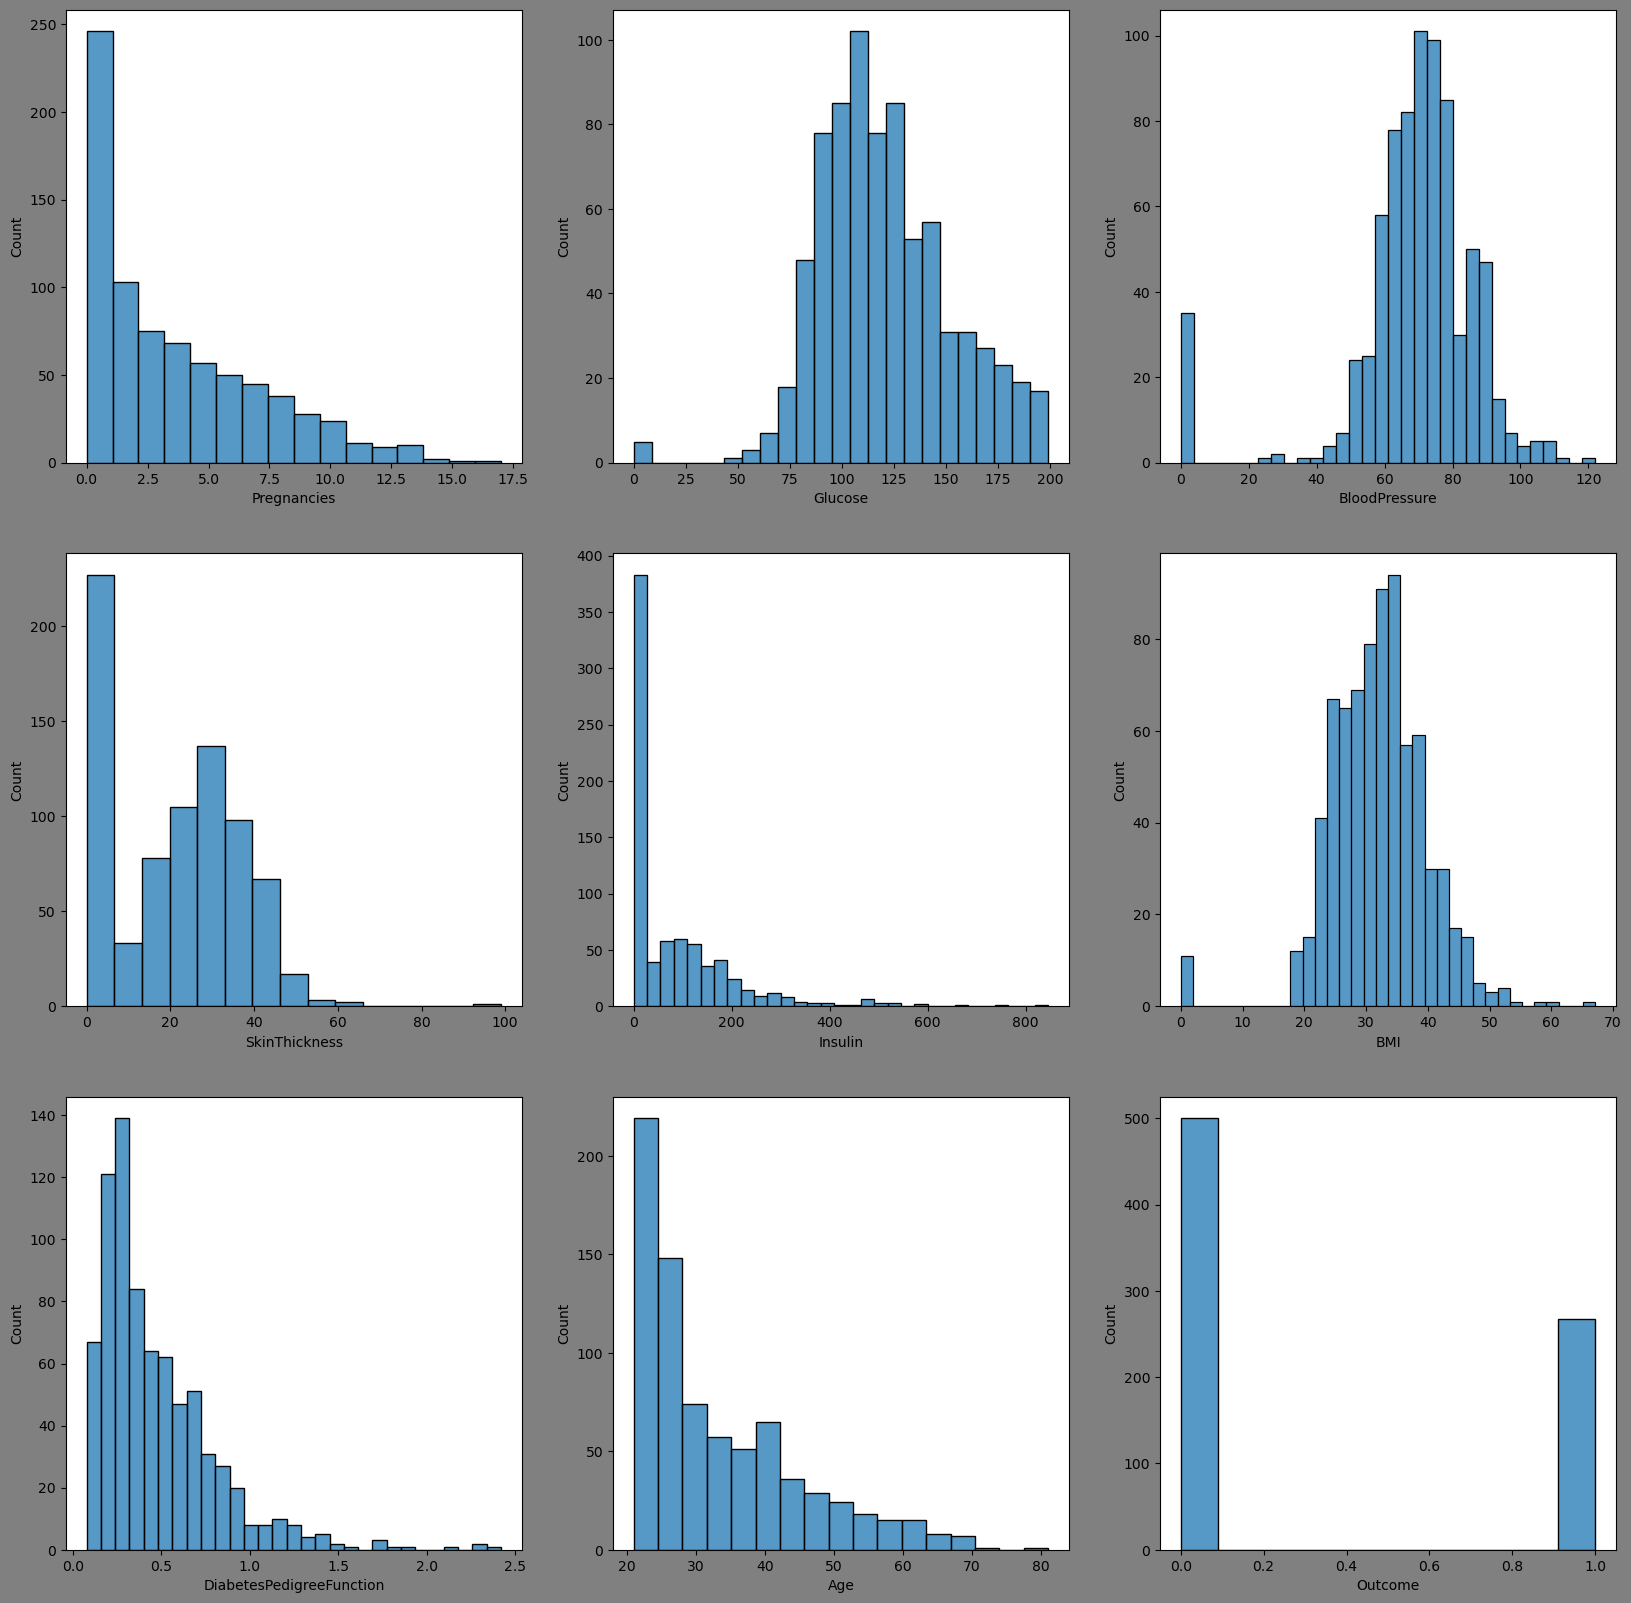

In [8]:
plt.figure(figsize=(20,20),facecolor='grey')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
    plotnumber+=1
plt.show()   

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               674 non-null    int64  
 1   Glucose                   674 non-null    int64  
 2   BloodPressure             674 non-null    int64  
 3   SkinThickness             674 non-null    int64  
 4   Insulin                   674 non-null    int64  
 5   BMI                       674 non-null    float64
 6   DiabetesPedigreeFunction  674 non-null    float64
 7   Age                       674 non-null    int64  
 8   Outcome                   674 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.7 KB


<Axes: >

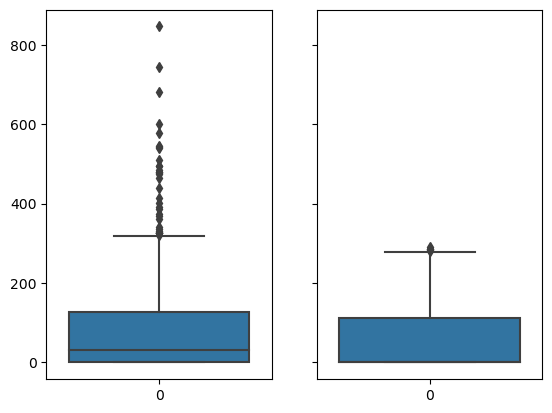

In [13]:
fig,ax=plt.subplots(1,2,sharey=True)
sns.boxplot(data=df.Insulin,ax=ax[0])
sns.boxplot(data=df_new.Insulin,ax=ax[1])

In [14]:
from feature_engine.outliers.winsorizer import Winsorizer

In [16]:
winsorizer=Winsorizer(capping_method='iqr',
                     tail='both',
                     fold=1.5,
                     variables='Glucose')

In [22]:
df_new['Glucose']=winsorizer.fit_transform(df_new[['Glucose']])

<Axes: >

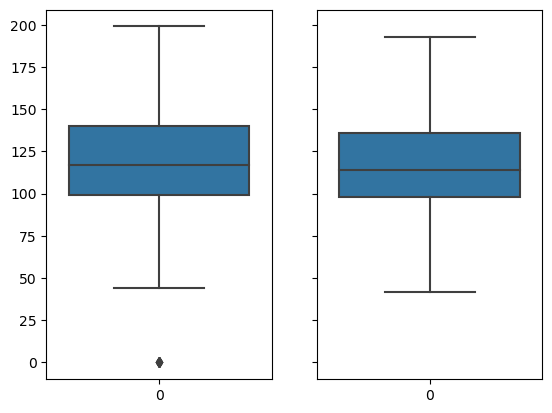

In [24]:
fig,ax=plt.subplots(1,2,sharey=True)
sns.boxplot(data=df.Glucose,ax=ax[0])
sns.boxplot(data=df_new.Glucose,ax=ax[1])

In [27]:
x=df_new.drop(columns='Outcome')

In [36]:
y = df_new['Outcome']

In [33]:
scalar=StandardScaler()
x_scaled=scaler.fit_transform(x)

<Axes: >

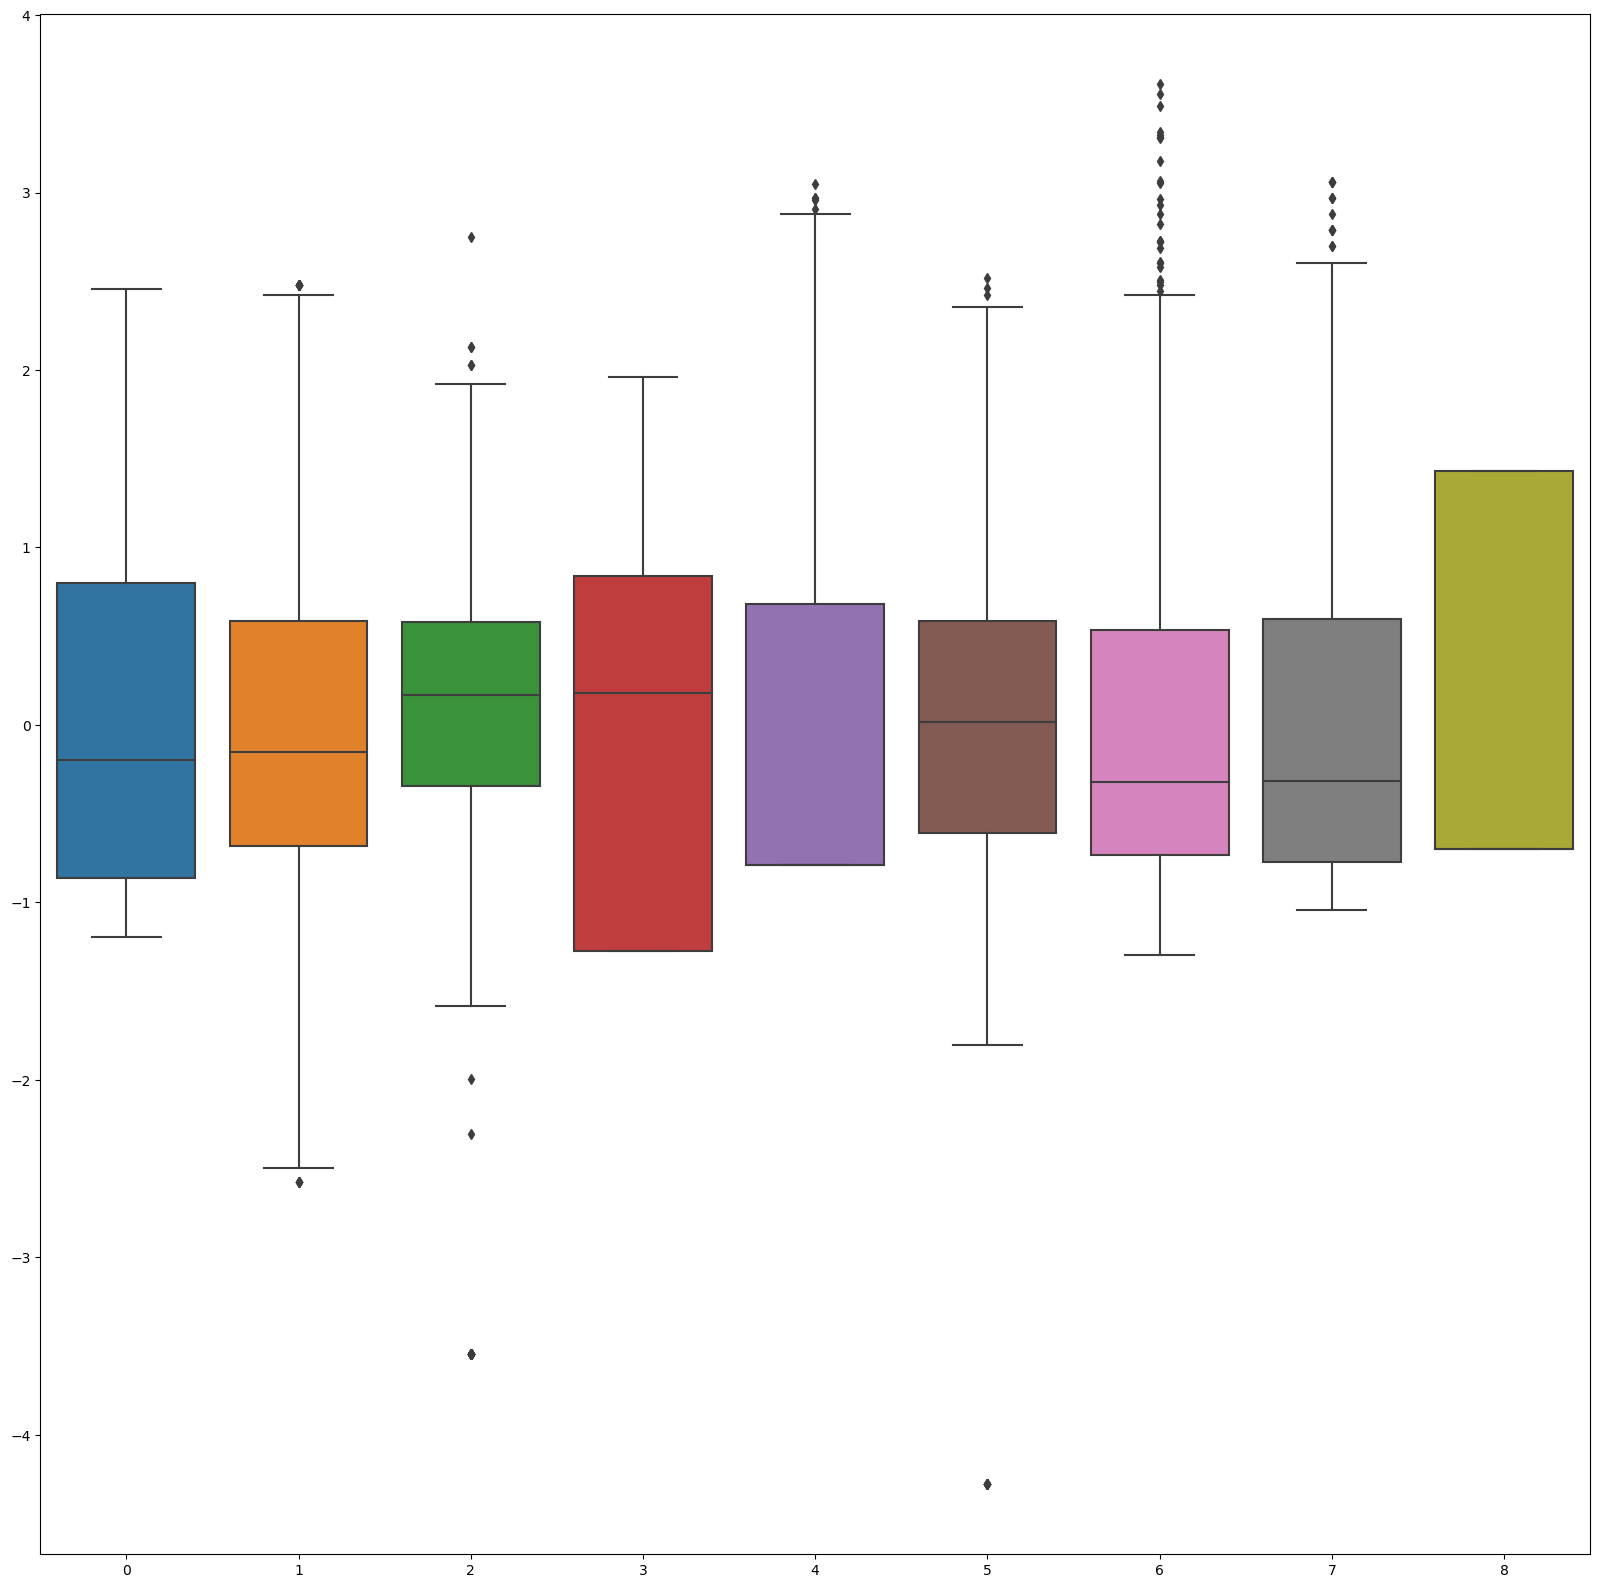

In [34]:
df_new_scalar = pd.DataFrame(scalar.fit_transform(df_new))
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new_scalar , ax = ax)

In [39]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [43]:
vif_score(x)

,FEATURE,VIF_SCORE
0,Pregnancies,1.453816
1,Glucose,1.259944
2,BloodPressure,1.220542
3,SkinThickness,1.658846
4,Insulin,1.526396
5,BMI,1.298005
6,DiabetesPedigreeFunction,1.060586
7,Age,1.656506


In [95]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=22)

In [96]:
x_train

array([[-1.19710303,  2.32410384,  0.68507262, ...,  0.0711003 ,
         0.82349533, -0.95413254],
       [-0.86479354, -1.05719654,  0.47882407, ...,  0.42456462,
        -1.21540042, -0.95413254],
       [-0.20017456, -0.11980634, -0.13992159, ...,  0.90038197,
        -1.04344536, -0.40651517],
       ...,
       [-1.19710303,  0.65019276, -0.44929441, ...,  0.42456462,
         0.30412085, -1.0454021 ],
       [-0.86479354, -0.220241  ,  0.16945124, ...,  0.39737506,
         0.28306513, -0.68032385],
       [ 1.79368238,  1.25280075,  0.89132117, ...,  0.38378027,
         2.60270383,  0.87125869]])

In [58]:
logr=LogisticRegression(verbose=1)

In [59]:
logr.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [81]:
logr.predict([x_test[66]])

array([1], dtype=int64)

In [82]:
logr.predict_proba([x_test[66]])

array([[0.21118999, 0.78881001]])

In [83]:
logr.predict_log_proba([x_test[66]])

array([[-1.55499711, -0.23722979]])

In [89]:
y_pred=logr.predict(x_test)

In [100]:
lib_log=LogisticRegression(solver='liblinear',verbose=1)

In [102]:
lib_log.fit(x_train,y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [104]:
lib_log.predict_proba([x_test[66]])

array([[0.21035791, 0.78964209]])

In [106]:
y_pred1=lib_log.predict(x_test)

In [105]:
confusion_matrix(y_test,y_pred)

array([[82,  7],
       [21, 25]], dtype=int64)

In [107]:
confusion_matrix(y_test,y_pred1)

array([[82,  7],
       [21, 25]], dtype=int64)

In [109]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result
model_eval(y_test,y_pred)

{'Accuracy': 0.7925925925925926,
 'Precision': 0.78125,
 'Recall': 0.5434782608695652,
 'Specficity': 0.9213483146067416,
 'F1': 0.641025641025641}

In [110]:
model_eval(y_test,y_pred1)

{'Accuracy': 0.7925925925925926,
 'Precision': 0.78125,
 'Recall': 0.5434782608695652,
 'Specficity': 0.9213483146067416,
 'F1': 0.641025641025641}

In [112]:
auc = roc_auc_score(y_test,y_pred)
auc

0.7324132877381534

In [113]:
auc = roc_auc_score(y_test,y_pred1)
auc

0.7324132877381534

In [115]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7925925925925926

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        89
           1       0.78      0.54      0.64        46

    accuracy                           0.79       135
   macro avg       0.79      0.73      0.75       135
weighted avg       0.79      0.79      0.78       135



In [125]:
roc_auc_score(y_test,y_pred)

0.7324132877381534

In [126]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred)

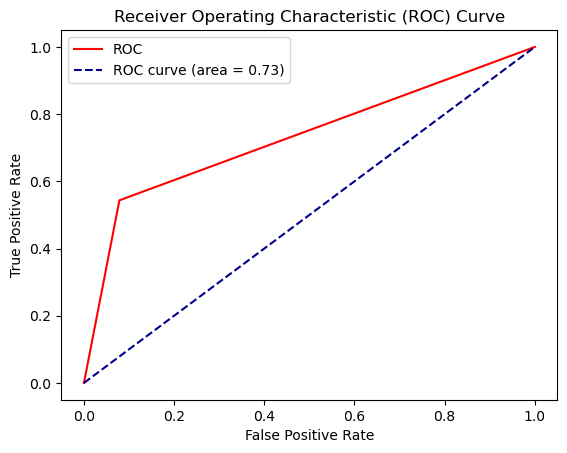

In [142]:
plt.plot(fpr, tpr, color='Red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()